# Supervised Learning - Foundations Project: ReCell 

## Problem Statement



 


 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
!pip install scikit-learn





[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset


# Explore the dataset



## Loading the dataset

In [3]:
df= pd.read_csv("Dataset+-+User+Device+Data.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
df.head(50)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


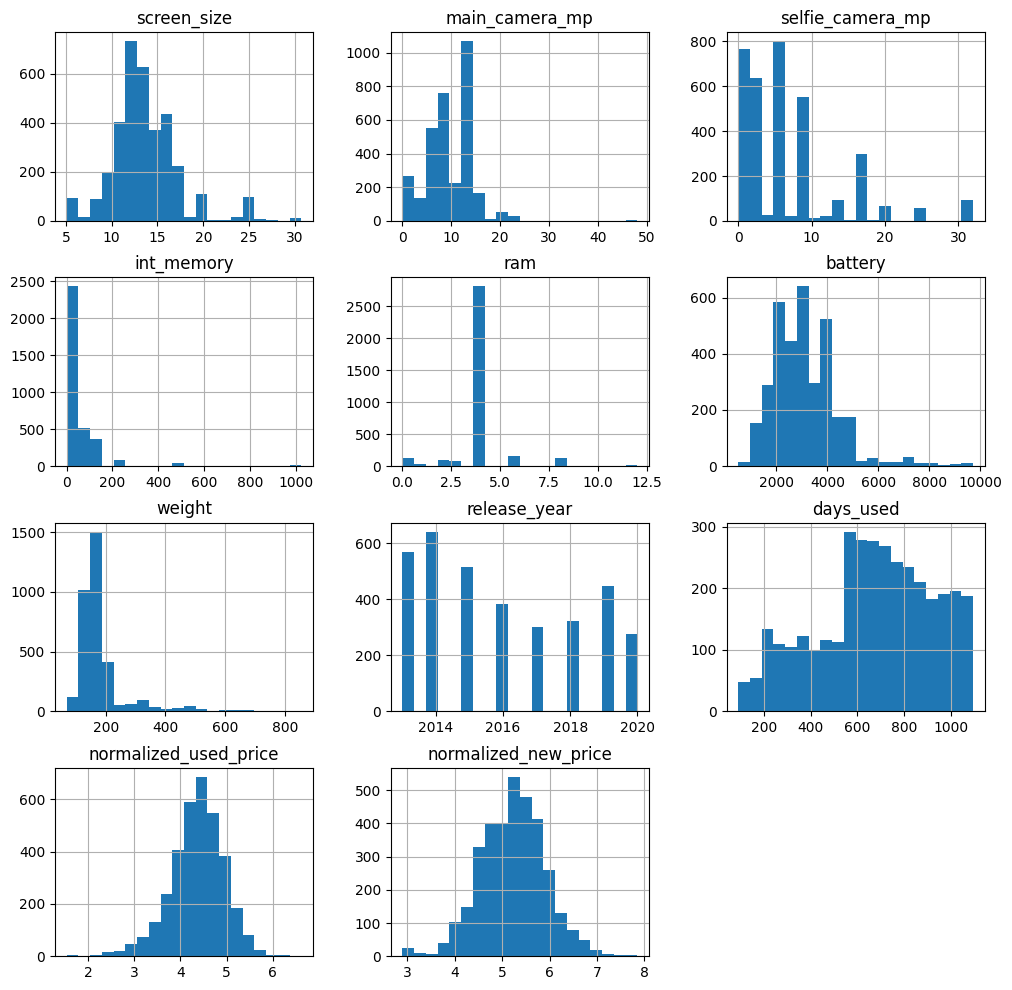

In [5]:
df.hist(figsize=(12, 12), bins=20)
plt.show()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [6]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [7]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

                                                                  ans1.1

In [8]:
import warnings
warnings.filterwarnings("ignore")


<Axes: xlabel='normalized_used_price', ylabel='Count'>

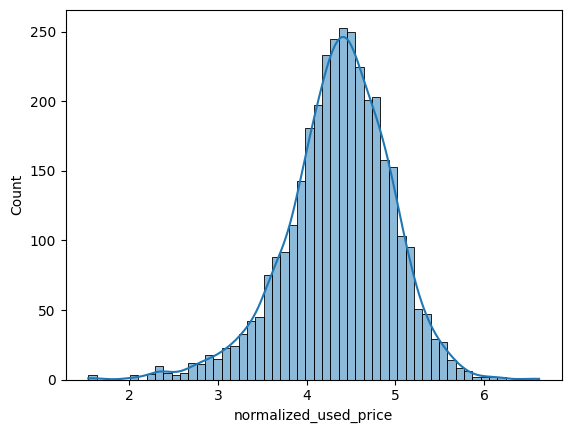

In [9]:
sns.histplot(df['normalized_used_price'],kde='true')

<Axes: >

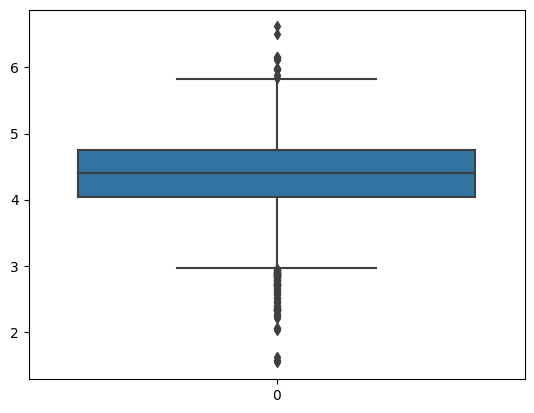

In [10]:
sns.boxplot(df['normalized_used_price'])

the data contain many ouliers making it right skewed

                                                                 ans1.2

In [11]:

os=pd.DataFrame(df['os'].value_counts())
os.rename(columns={'count': 'percentage_share'}, inplace=True)

os=(os/os.sum())*100
os





,percentage_share
os,
Android,93.051534
Others,3.966416
Windows,1.939780
iOS,1.042270


the percentage for android in market is 93.05%

                                                                     1.3

<Axes: xlabel='brand_name', ylabel='ram'>

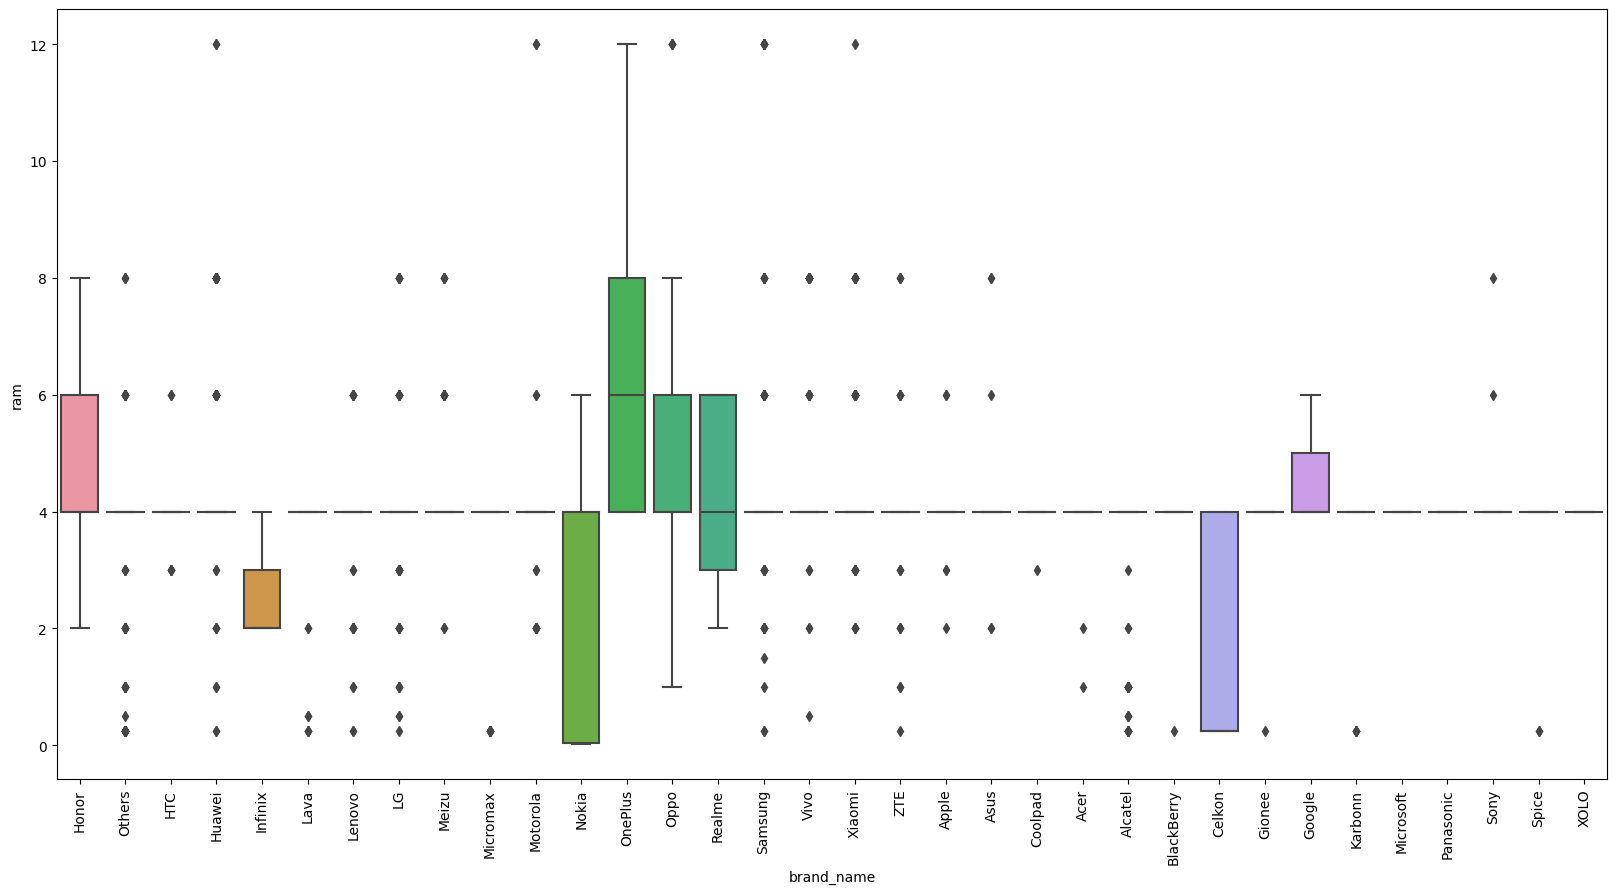

In [12]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(x=df['brand_name'],y=df['ram'])


most of the oneplus phone have higher ram.whereas ram of most of the phones of nokia and celkon lie in lower region
.


                                                                    ans1.4

In [13]:
large_battery=pd.DataFrame(df[df['battery']>4500])
large_battery

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Samsung,Android,15.47,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,5.623042,6.792120
3421,Samsung,Android,15.47,yes,no,8.0,13.0,128.0,12.0,5000.0,220.0,2020,176,5.594265,6.960775
3434,Samsung,Android,15.34,yes,no,12.0,16.0,64.0,4.0,6000.0,188.0,2019,455,4.781641,5.109937
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


<Axes: xlabel='weight', ylabel='Count'>

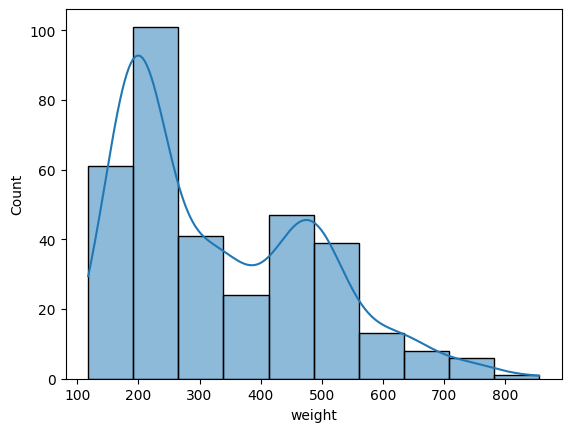

In [14]:
sns.histplot(large_battery['weight'],kde='true')

<Axes: xlabel='battery', ylabel='weight'>

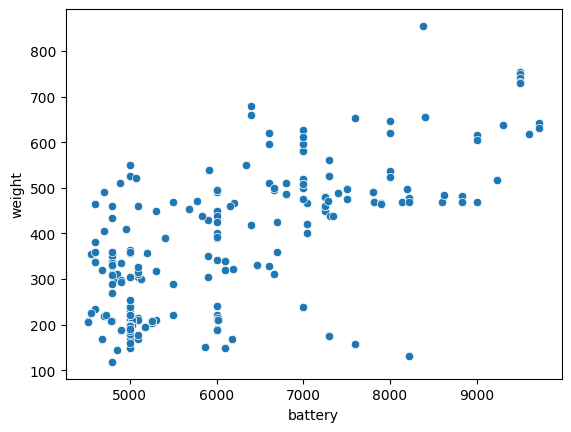

In [15]:
sns.scatterplot(large_battery,x='battery',y='weight')

with increase in battery weight seem to be increasing ,maximum number of phones having battery greater than 4500 has weight between 200-300.

                                                                      ans1.5

<Axes: xlabel='brand_name', ylabel='count'>

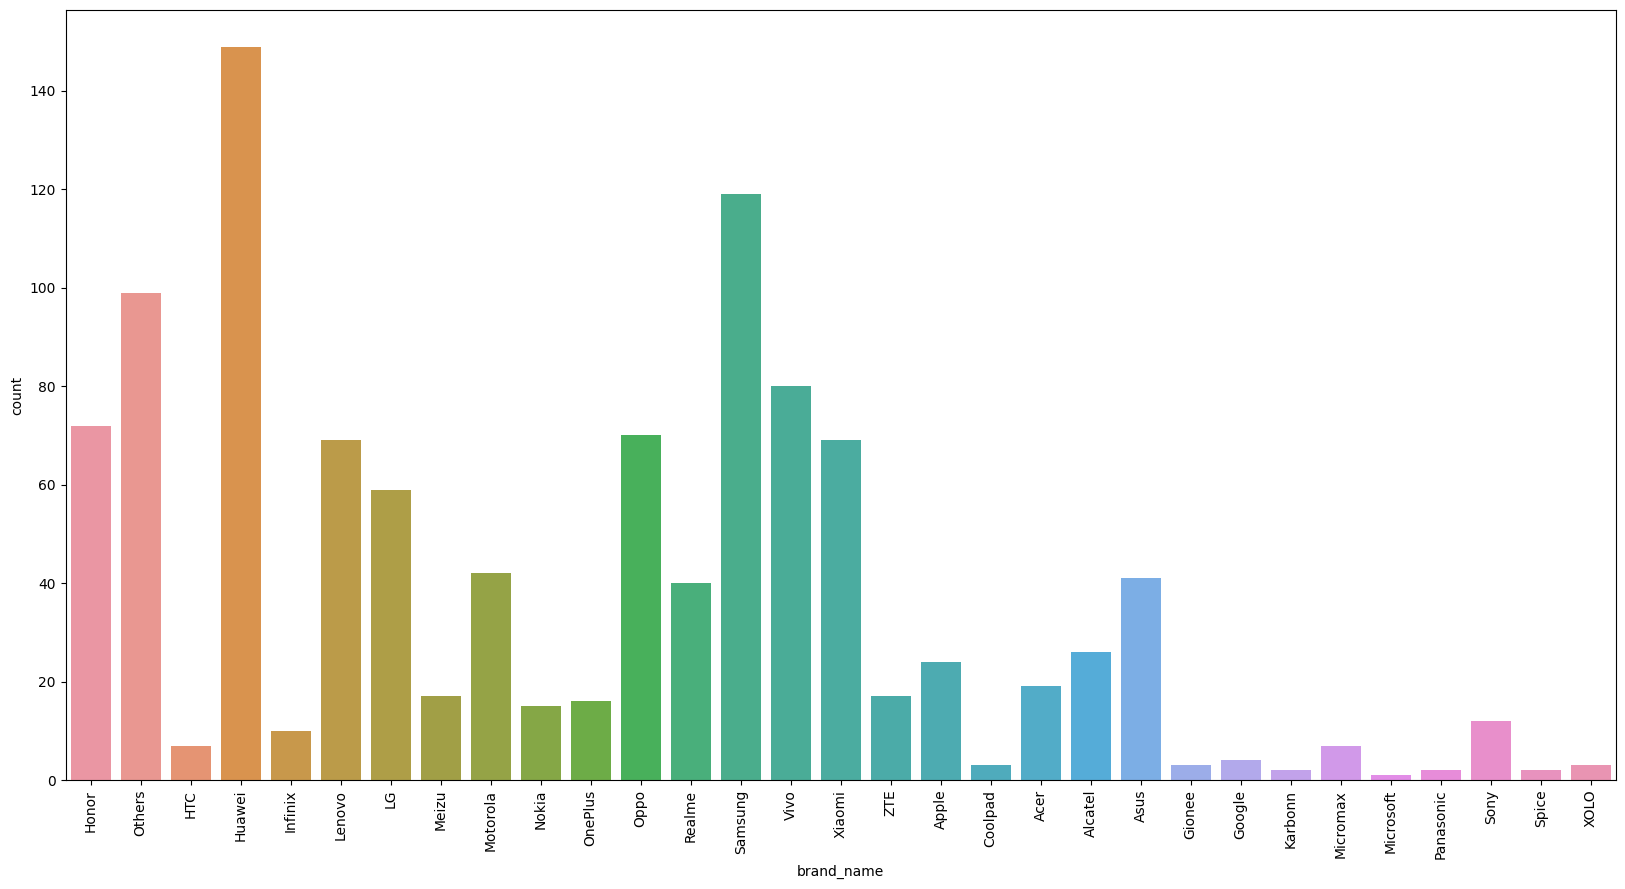

In [16]:
large_screens=pd.DataFrame(df[df['screen_size']>6*2.54])
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
new_df=pd.DataFrame(large_screens['brand_name'].value_counts())
new_df
sns.countplot(x='brand_name', data=large_screens)


                                                                       ans1.6

In [17]:
large_screens=pd.DataFrame(df[df['selfie_camera_mp']>8])
new_df=pd.DataFrame(large_screens['brand_name'].value_counts())
new_df



,count
brand_name,
Huawei,87
Vivo,78
Oppo,75
Xiaomi,63
Samsung,57
Honor,41
Others,34
LG,32
Motorola,26


<Axes: xlabel='brand_name', ylabel='count'>

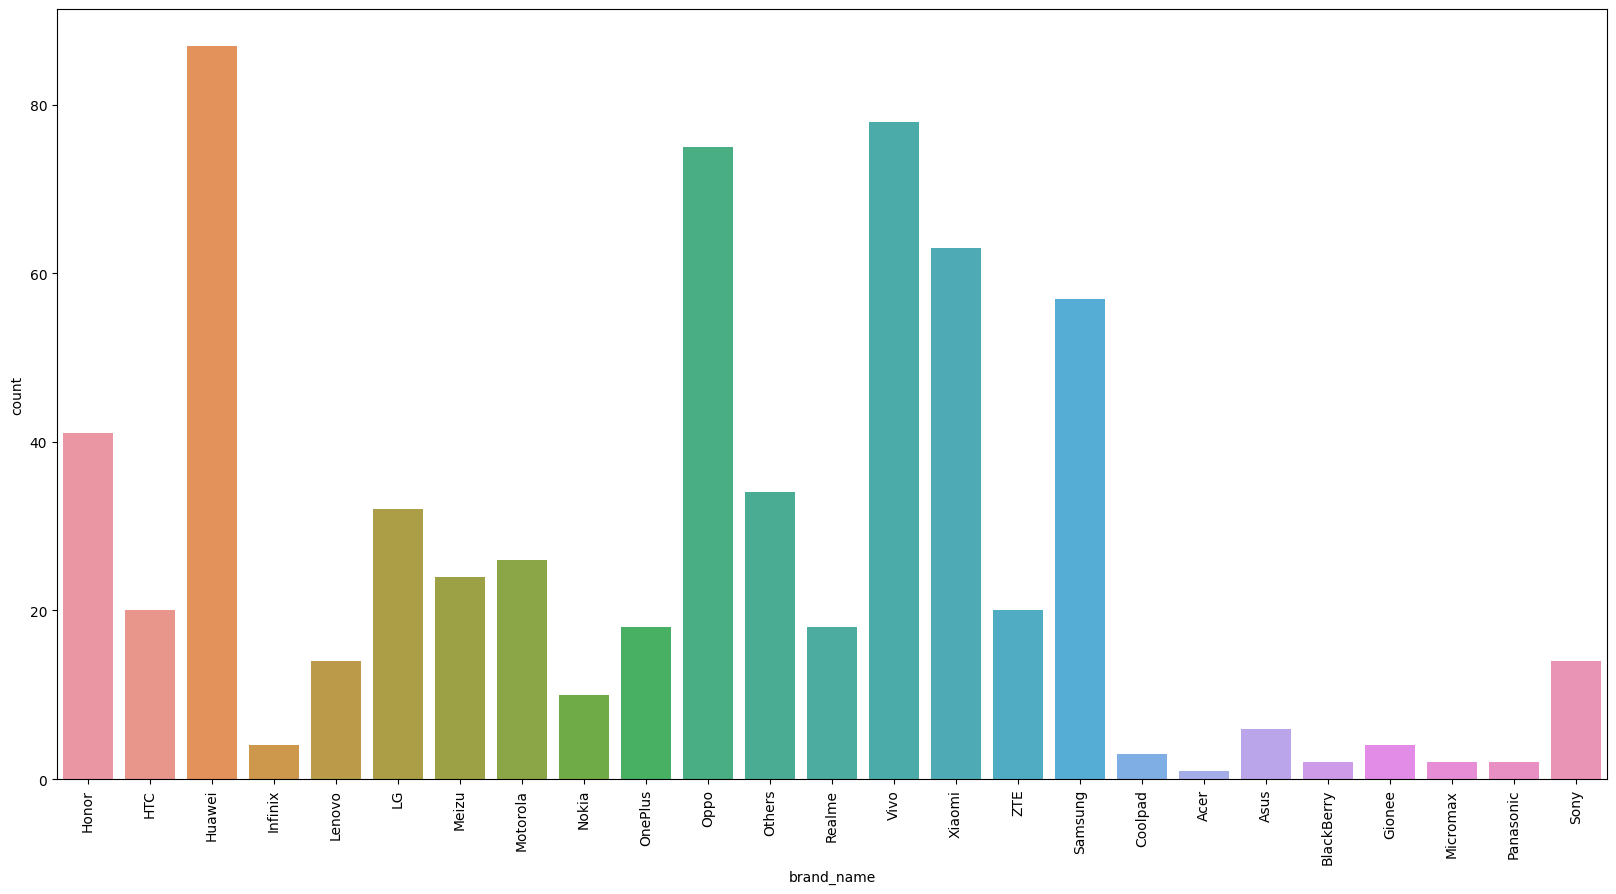

In [18]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='brand_name', data=large_screens)

                                                                     ans1.7

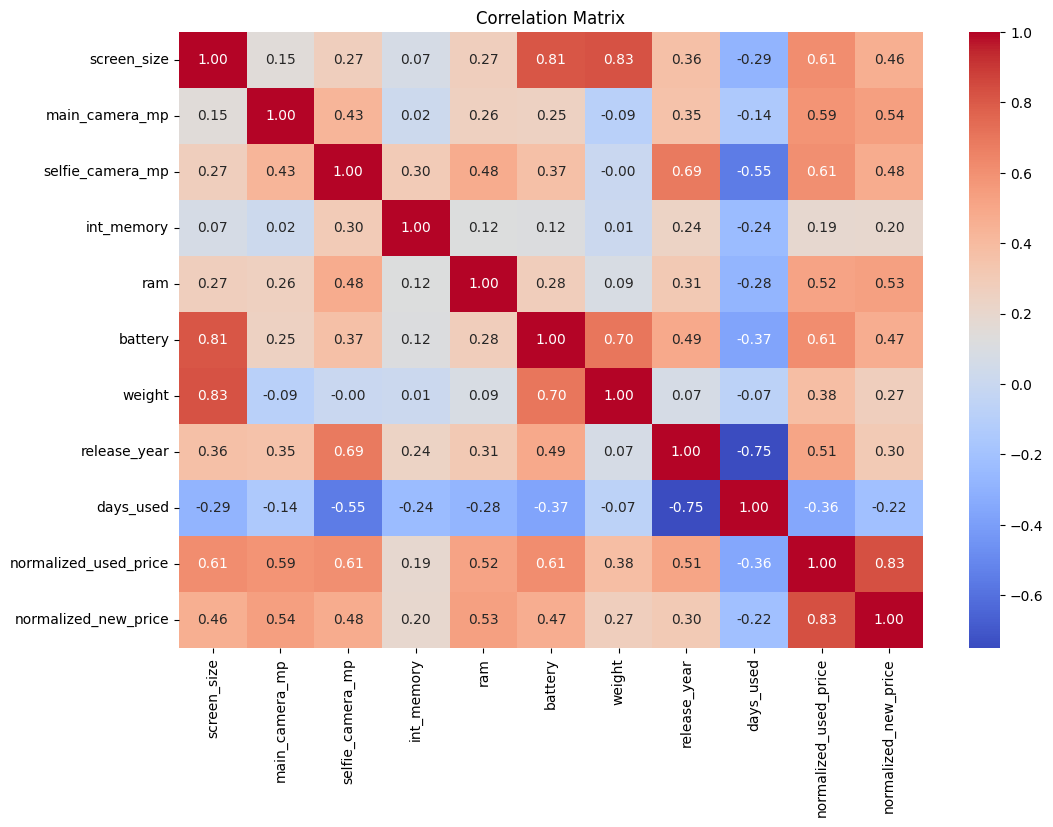

normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size              0.614785
battery                  0.613619
selfie_camera_mp         0.608074
main_camera_mp           0.587302
ram                      0.520289
release_year             0.509790
weight                   0.382354
int_memory               0.190993
days_used               -0.358264
Name: normalized_used_price, dtype: float64


In [19]:



correlation_matrix = df.corr(numeric_only='true')
correlation_with_price = correlation_matrix['normalized_used_price'].sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Display the correlation with 'normalized_used_price'
print(correlation_with_price)


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [20]:
processed_df = df.copy()

numeric_columns = df.select_dtypes(include=['number']).columns

# Apply lambda function to fill missing values with the median for each numeric column
processed_df[numeric_columns] = processed_df[numeric_columns].apply(lambda x: x.fillna(x.median()), axis=0)





In [21]:
processed_df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [22]:
processed_df = pd.get_dummies(processed_df, columns=['4g','5g','os'])

In [23]:
processed_df

,brand_name,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,4g_no,4g_yes,5g_no,5g_yes,os_Android,os_Others,os_Windows,os_iOS
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,False,True,True,False,True,False,False,False
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,False,True,False,True,True,False,False,False
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,False,True,False,True,True,False,False,False
3,Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,False,True,False,True,True,False,False,False
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,15.34,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872,False,True,True,False,True,False,False,False
3450,Asus,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538,False,True,True,False,True,False,False,False
3451,Alcatel,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,False,True,True,False,True,False,False,False
3452,Alcatel,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188,False,True,True,False,True,False,False,False


In [24]:
coloumns=processed_df.iloc[:,-8:]
coloumns

,4g_no,4g_yes,5g_no,5g_yes,os_Android,os_Others,os_Windows,os_iOS
0,False,True,True,False,True,False,False,False
1,False,True,False,True,True,False,False,False
2,False,True,False,True,True,False,False,False
3,False,True,False,True,True,False,False,False
4,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...
3449,False,True,True,False,True,False,False,False
3450,False,True,True,False,True,False,False,False
3451,False,True,True,False,True,False,False,False
3452,False,True,True,False,True,False,False,False


In [25]:
for coloumn in coloumns:
    processed_df[coloumn]=processed_df[coloumn].astype(int)

In [26]:
processed_df

,brand_name,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,4g_no,4g_yes,5g_no,5g_yes,os_Android,os_Others,os_Windows,os_iOS
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,0,1,1,0,1,0,0,0
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,0,1,0,1,1,0,0,0
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,0,1,0,1,1,0,0,0
3,Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,0,1,0,1,1,0,0,0
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,15.34,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872,0,1,1,0,1,0,0,0
3450,Asus,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538,0,1,1,0,1,0,0,0
3451,Alcatel,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,0,1,1,0,1,0,0,0
3452,Alcatel,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188,0,1,1,0,1,0,0,0


In [27]:
processed_df.dtypes

brand_name                object
screen_size              float64
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
4g_no                      int32
4g_yes                     int32
5g_no                      int32
5g_yes                     int32
os_Android                 int32
os_Others                  int32
os_Windows                 int32
os_iOS                     int32
dtype: object

                                                                  outlier detection

In [28]:
# Identify outliers using z-scores
from scipy.stats import zscore
numeric_columns = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used']


# Replace outliers with the median value
for coloumn in numeric_columns:
    z_scores = zscore(processed_df[coloumn])
    outliers = (np.abs(z_scores) > 3)
    df_no_outliers = processed_df[~outliers]
    processed_df[coloumn] = np.where(outliers, processed_df[coloumn].median(), processed_df[coloumn])


## boxplot after dealing with outliers

<Axes: >

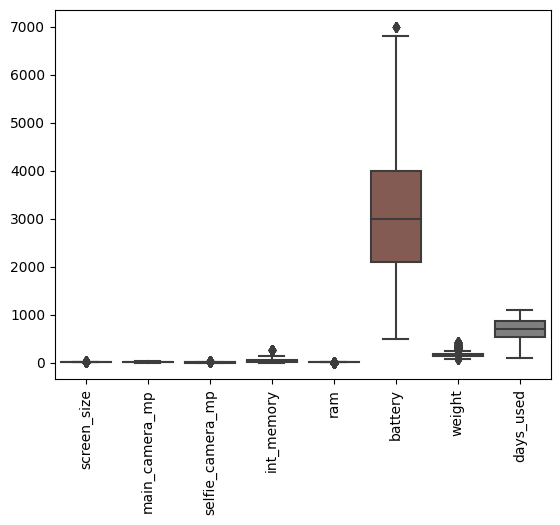

In [29]:
plt.xticks(rotation=90)
sns.boxplot(data=processed_df[numeric_columns])

## boxplot without outliers

<Axes: >

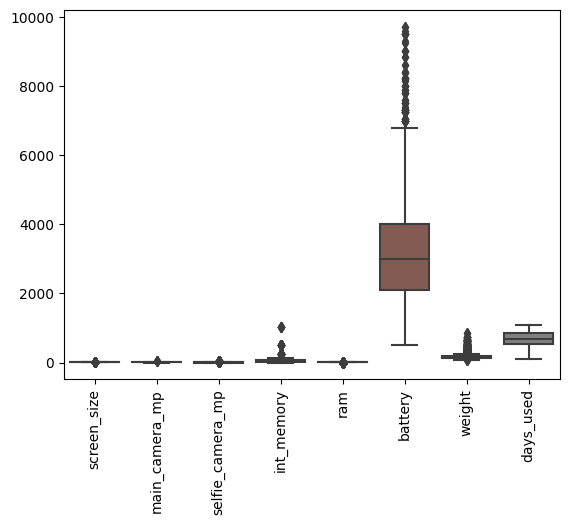

In [30]:
plt.xticks(rotation=90)
sns.boxplot(data=df[numeric_columns])

## EDA

- It is a good idea to explore the data once again after manipulating it.

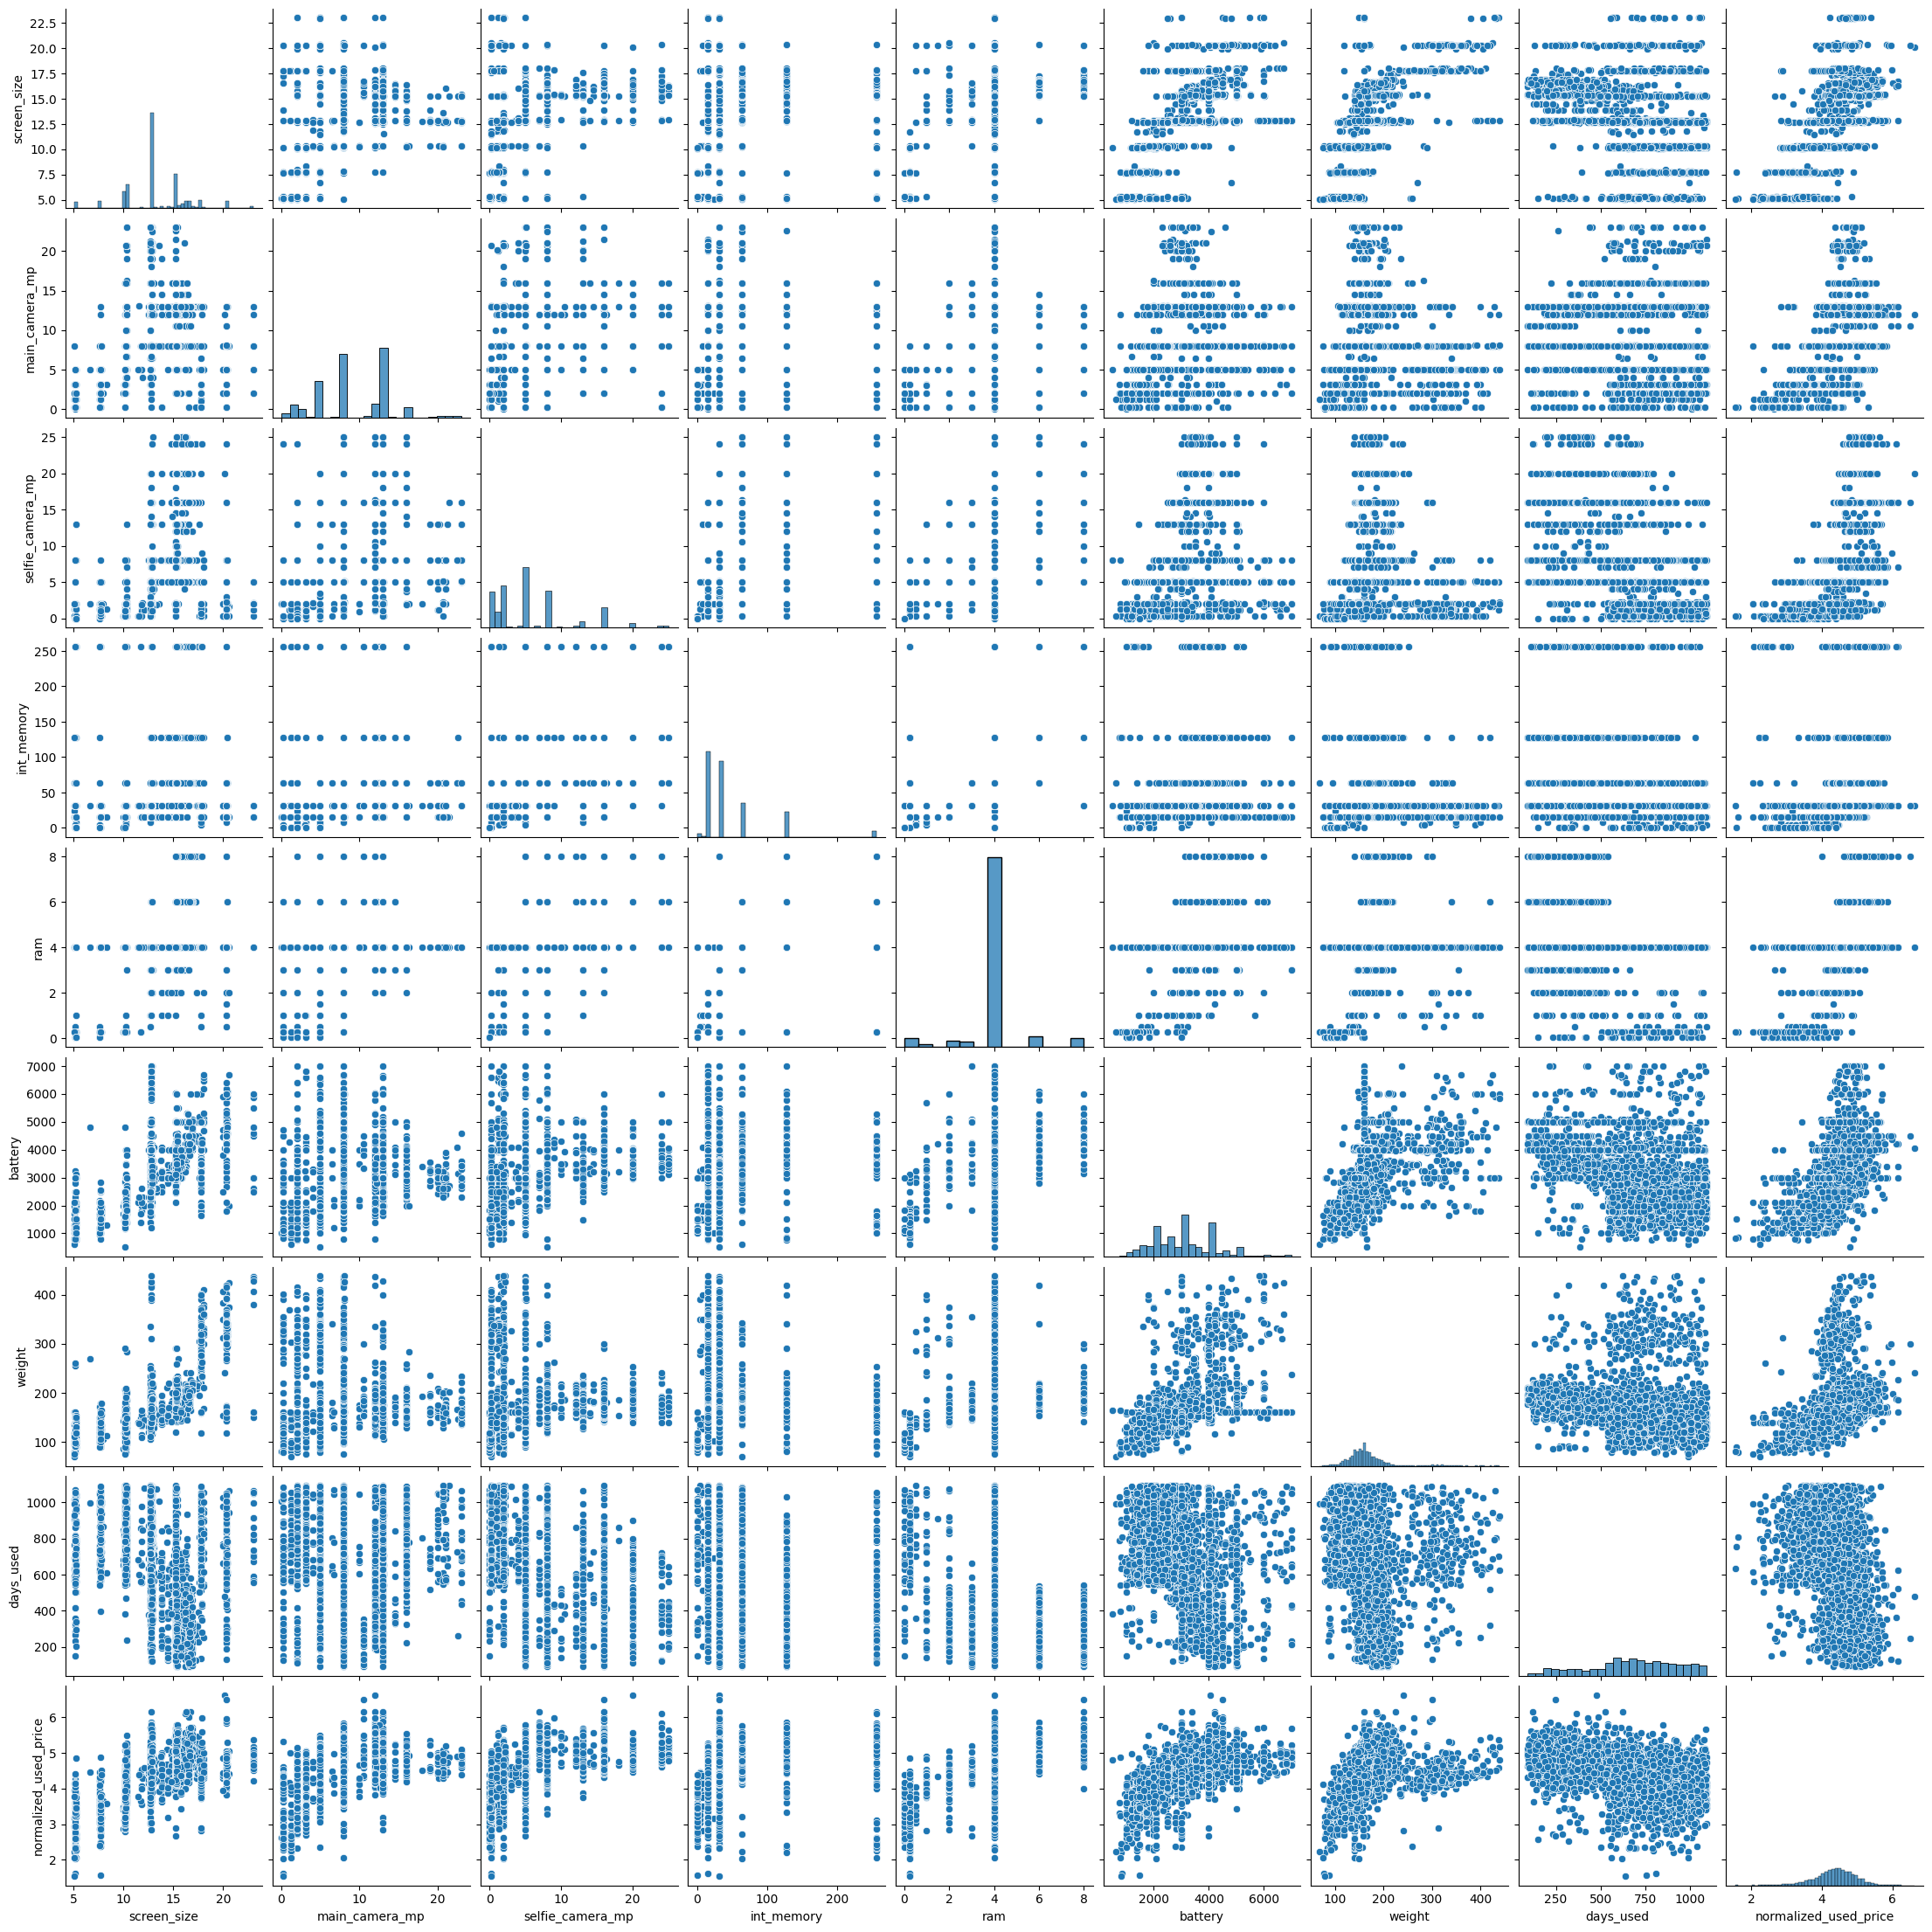

In [31]:
columns_to_include = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used','normalized_used_price']

sns.pairplot(processed_df[columns_to_include])


array([[<Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'main_camera_mp'}>,
        <Axes: title={'center': 'selfie_camera_mp'}>],
       [<Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'battery'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'days_used'}>,
        <Axes: title={'center': 'normalized_new_price'}>,
        <Axes: title={'center': 'normalized_used_price'}>]], dtype=object)

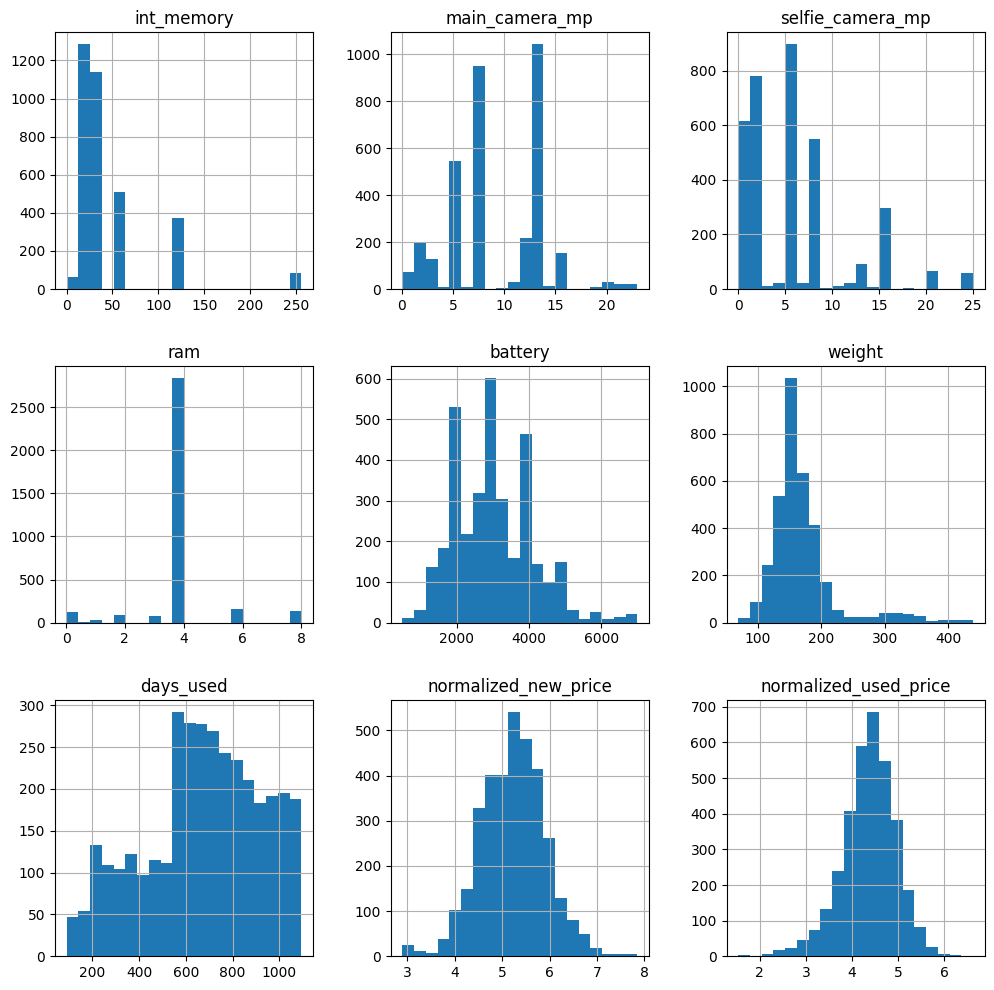

In [32]:
selected_columns = ['int_memory', 'main_camera_mp','selfie_camera_mp','ram', 'battery', 'weight', 'days_used', 'normalized_new_price', 'normalized_used_price']
processed_df[selected_columns].hist(figsize=(12, 12), bins=20)

## Model Building - Linear Regression

In [33]:

X = processed_df.drop(["normalized_used_price","brand_name"], axis=1)
y = processed_df["normalized_used_price"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [38]:
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


for col_name, coef in zip(X_train.columns, regression_model.coef_):
    print("The coefficient for {} is {}".format(col_name, coef))


Mean Squared Error: 0.06458789605520636
R-squared: 0.8209269724422852
The coefficient for screen_size is 0.029078144514775597
The coefficient for main_camera_mp is 0.018480130490315463
The coefficient for selfie_camera_mp is 0.005789358014593434
The coefficient for int_memory is 0.0006693195850289525
The coefficient for ram is 0.02752447052791836
The coefficient for battery is 4.442942047390084e-05
The coefficient for weight is 0.0004777269909627345
The coefficient for release_year is 0.02961347867982858
The coefficient for days_used is 4.4178428764025996e-05
The coefficient for normalized_new_price is 0.4616289852471701
The coefficient for 4g_no is 8.556276364976605e-05
The coefficient for 4g_yes is -8.556276364956439e-05
The coefficient for 5g_no is 0.015860922656891787
The coefficient for 5g_yes is -0.01586092265689174
The coefficient for os_Android is -0.01968613154845185
The coefficient for os_Others is -0.015101213349923915
The coefficient for os_Windows is 0.029948862301229156
T

## Model Performance Check

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 0.06458789605520636
Mean Absolute Error (MAE): 0.19494164104031947
R-squared: 0.8209269724422852


In [40]:
regression_model.score(X_test, y_test)

0.8209269724422852

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Checking the assumptions of linear regression is an important step to ensure the reliability of the model. Here are some common assumptions and methods to check them:

Linearity:

Assumption: The relationship between the independent variables and the dependent variable is linear.
Check: Plot the predicted values against the residuals. There should be no discernible pattern.

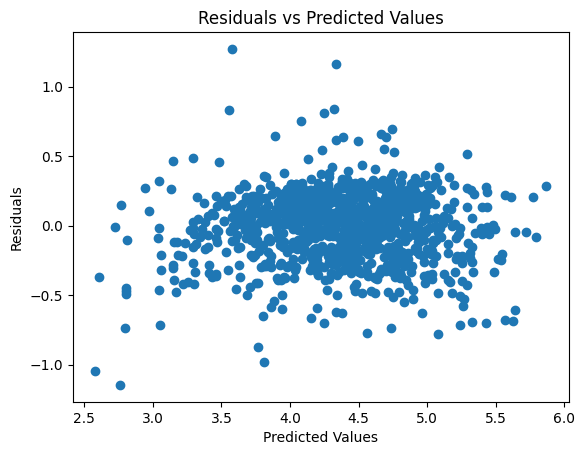

In [41]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Normality of Residuals:

Assumption: Residuals should be normally distributed.
Check: Use a histogram or a Q-Q plot of residuals.

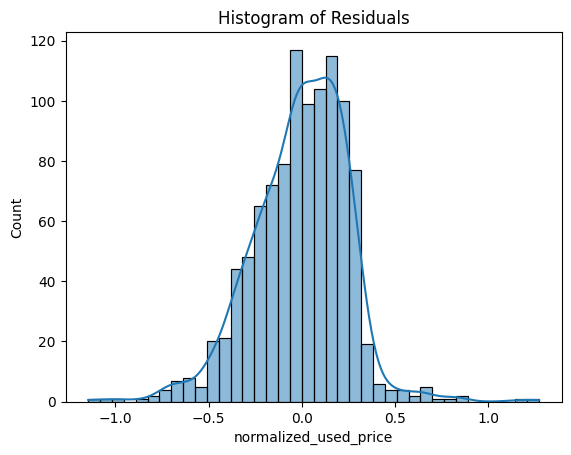

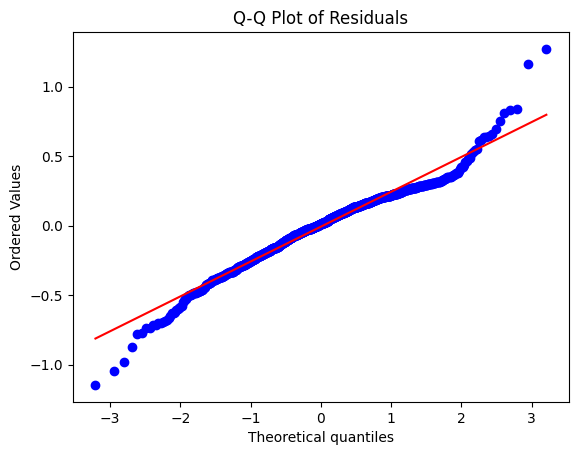

In [42]:
import seaborn as sns
from scipy.stats import probplot

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



Homoscedasticity (Constant Variance):

Assumption: Residuals should have constant variance.
Check: Plot residuals against predicted values. There should be no pattern.

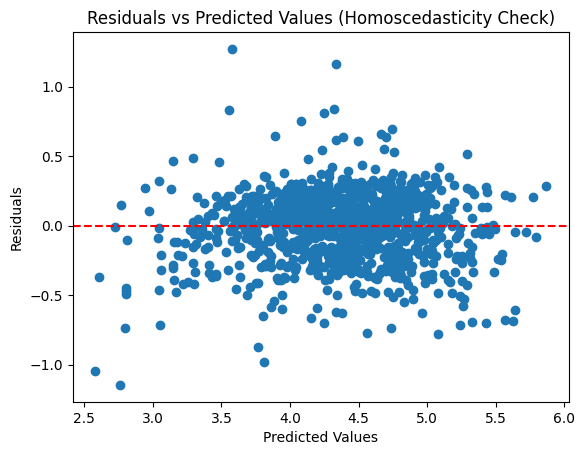

In [43]:
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Check for constant spread
plt.show()


Independence of Residuals:

Assumption: Residuals should be independent.
Check: Plot residuals against time or order of observations. There should be no pattern.

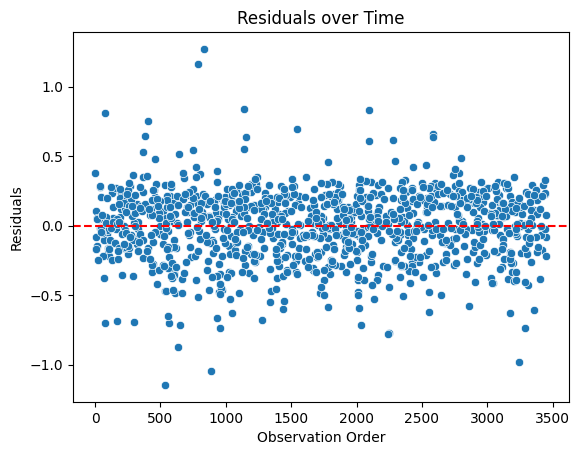

In [44]:

plt.title('Residuals over Time')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Check for independence
sns.scatterplot(residuals)
plt.show()


## Final Model

- for final model i have considered coloumns except of brand_name as brand name seem to be decreasing the accuracy of the model
- final model contain all other coloumns as removing other coloumns does not seem to effect accuracy such as screen size and other with small coefficient
- In final model i have dealt with outlier however there seem to be not much of change in accuracy .
- Hence i will be using the above mentioned linear model as my final model. 

## Actionable Insights and Recommendations 

 based on given data we have  developed a linear regression model to predict the price of used and refurbished devices. Here are some actionable       insights and recommendations based on the context of the  project::- 

ingntify the predictors with the most significant impact on the predicted prices. This information can be obtained from the model coeffi   nts. Focus on these features when making pricing deioncis
for example in our model predictor wimth ost impact is of days_uoit-y:
Uningderstand how different features (e.g., screen size, camera resolution, battery capacity) influence the device's price. This can help in setting competitive prices based on specific features that are valued  by c),for example prices seems to be  increasing with battery,screens- ze.

-data should be collected more accurately as there seems to be many empty coloumns specialy for attribute such as days_used and other with higher coeffiect- R
-sa
recomenati- ons:

Emphasize the environmental benefits of purchasing used/refurbished devices. Highlight the reduced environmental impact and contribute to the sustainability narrative
Customer Segmen- tation:

Consider segmenting your customers based on their preferences and willingness to pay for specific features. Tailor pricing strategies to different customer segments.
Promotion- al Offers:

Implement promotional offers or discounts strategically. Use data from the model to identify optimal times for promotions, potentially boosting sales during slow periods.
Continuous Model-  Improvement:

Regularly update the model with new data to improve its accuracy and relevance. Stay informed about the latest technology trends and industry developments to enhance the model's me- r Feedback Loop:

Establish a feedback loop with customers to understand their satisfaction with prices and device features. Use this information to iteraconditions and customer preferences.

- 


___